n_digits: 10, 	 n_samples 1797, 	 n_features 64


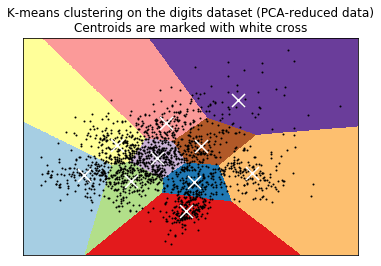

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


def bench_k_means(estimator, name, data):
    estimator.fit(data)

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
print('--------------------------------------------------------')

--------------------------------------------------------


In [24]:
X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11],
              [7, 4],
              [5, 5]])

In [83]:
#nao eh o melhor algoritmo pra esse problema
X = np.array([[0.4,11.8,0.1],   #proteína, carboidrato, gordura
              [1.9,1.9,19.5],
              [1.2,23.2,0.3],
              [20.9,0,7.9],
              [13,19,11],
              [15.5,2.9,68.3],
              [10.5,37,3.2],
              [1,0,81],
              [25,0.1,34.4],
              [6.4,28.2,22.7],
              [5.7,58.7,29.3],
              [7,84,0.9],
              [12.5,0,10.8],
              [17,7,20],
              [3,36,13],
              [3.8,19.4,10.2],
              [20.9,5.1,38.3],
              [12.5,30,11],
              [10.1,27.3,24.2],
              [1.7,16.1,0.3],
              [6.9,74,2.8],
              [26.1,0.3,5.8],
              [0,95.1,0],
              [25.6,0,0.5],
              [0,0,0]])

nomes = np.array([['Maçãs'],
              ['Abacates'],
              ['Bananas'],
              ['Bife'],
              ['Big Mac'],
              ['Amendoim'],
              ['Pão'],
              ['Manteiga'],
              ['Queijo'],
              ['Pudim'],
              ['Biscoito'],
              ['Sucrilho'],
              ['Ovos'],
              ['Frango Empanado'],
              ['Batata Frita'],
              ['Chocolate Quente'],
              ['Salame'],
              ['Pizza'],
              ['Empada'],
              ['Batata'],
              ['Arroz'],
              ['Frango Assado'],
              ['Açúcar'],
              ['Filé de Atum'],
              ['Água']])

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print('--------------------------------------------------------')
print(labels)

[[  8.03333333  36.2         17.23333333]
 [ 18.7375       1.8         17.15      ]
 [  4.63333333  84.36666667   1.23333333]
 [  8.25         1.45        74.65      ]
 [  3.35        14.91666667   3.65      ]]
--------------------------------------------------------
[4 1 4 1 4 3 0 3 1 0 0 2 1 1 0 4 1 0 0 4 2 1 2 1 4]


coordinate: [  0.4  11.8   0.1] label: 4 Comida:  ['Maçãs']
coordinate: [  1.9   1.9  19.5] label: 1 Comida:  ['Abacates']
coordinate: [  1.2  23.2   0.3] label: 4 Comida:  ['Bananas']
coordinate: [ 20.9   0.    7.9] label: 1 Comida:  ['Bife']
coordinate: [ 13.  19.  11.] label: 4 Comida:  ['Big Mac']
coordinate: [ 15.5   2.9  68.3] label: 3 Comida:  ['Amendoim']
coordinate: [ 10.5  37.    3.2] label: 0 Comida:  ['Pão']
coordinate: [  1.   0.  81.] label: 3 Comida:  ['Manteiga']
coordinate: [ 25.    0.1  34.4] label: 1 Comida:  ['Queijo']
coordinate: [  6.4  28.2  22.7] label: 0 Comida:  ['Pudim']
coordinate: [  5.7  58.7  29.3] label: 0 Comida:  ['Biscoito']
coordinate: [  7.   84.    0.9] label: 2 Comida:  ['Sucrilho']
coordinate: [ 12.5   0.   10.8] label: 1 Comida:  ['Ovos']
coordinate: [ 17.   7.  20.] label: 1 Comida:  ['Frango Empanado']
coordinate: [  3.  36.  13.] label: 0 Comida:  ['Batata Frita']
coordinate: [  3.8  19.4  10.2] label: 4 Comida:  ['Chocolate Quente']
coordina

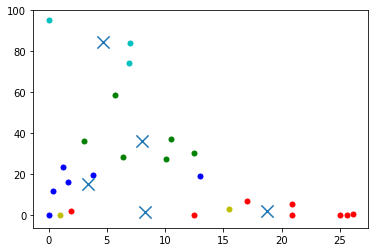

In [81]:
colors = ["g.","r.","c.","y.","b."]

groups = np.array([])
g = [[],[],[],[],[]]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i], "Comida: ",nomes[i])
    g[labels[i]].append(nomes[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
    
print(g[0])
print(g[1])
print(g[2])
print(g[3])
print(g[4])

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

In [82]:
g[4][4][0]

'Batata'